# Bharat Intern - Titanic Classification

# Importing the Libraries and Loading the data

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [17]:
titanic=pd.read_csv("train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
titanic.shape

(891, 12)

# Analysing data

<AxesSubplot:xlabel='Survived', ylabel='count'>

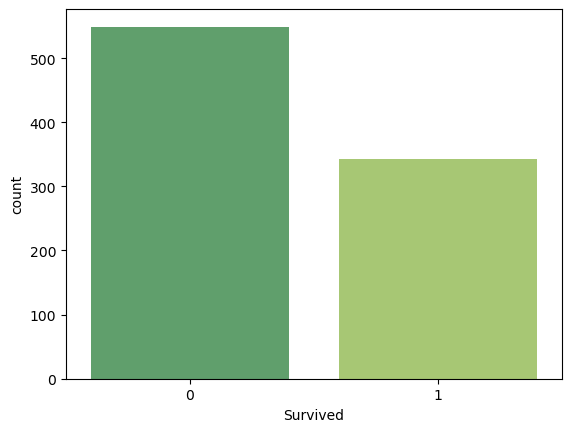

In [19]:
sns.countplot(x="Survived",data=titanic,palette="summer")

In [20]:
#those who did not survive(more than 500) are greater than those who survived(nearly 300)

<AxesSubplot:xlabel='Survived', ylabel='count'>

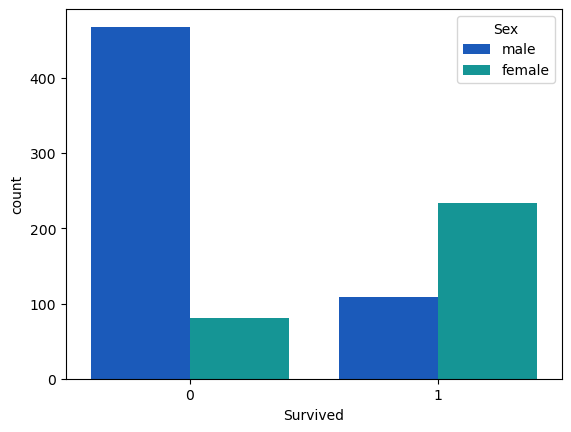

In [21]:
sns.countplot(x="Survived", hue="Sex", data=titanic, palette="winter")

In [22]:
# 0 represents did not survived whereas 1 represents survived
# womens are thrice more likely to survive than males

<AxesSubplot:xlabel='Survived', ylabel='count'>

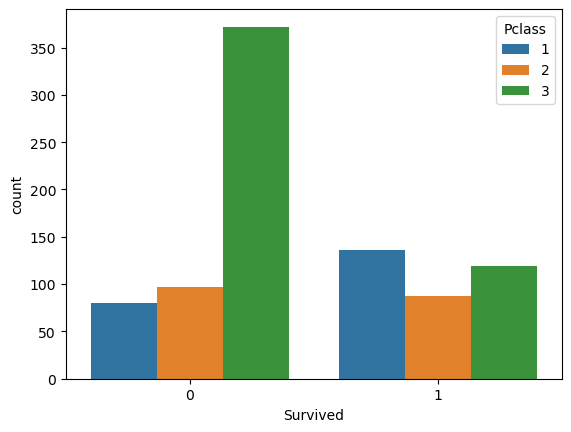

In [23]:
sns.countplot(x="Survived", hue="Pclass", data=titanic)

In [24]:
# The passengers who did not survived belong to 3rd class
# 1st class passengers are more likely to survive

<AxesSubplot:ylabel='Frequency'>

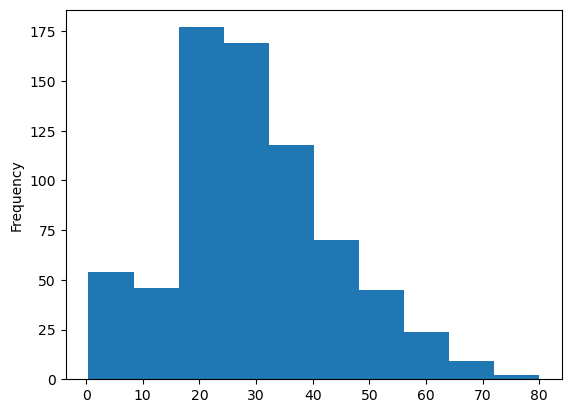

In [25]:
titanic['Age'].plot.hist()

In [26]:
    #Highest age group travelling are among the young age between 20-40
    #very few passengers in age group 70-80

<AxesSubplot:ylabel='Frequency'>

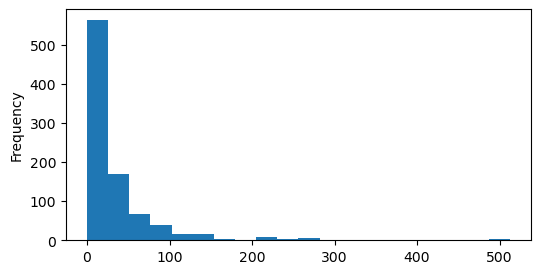

In [27]:
titanic["Fare"].plot.hist(bins=20 , figsize=(6,3))

In [28]:
# most of the tickets bought are under fare 100
# and very few are on the higher side of fare i.e. 220-500 range

<AxesSubplot:xlabel='SibSp', ylabel='count'>

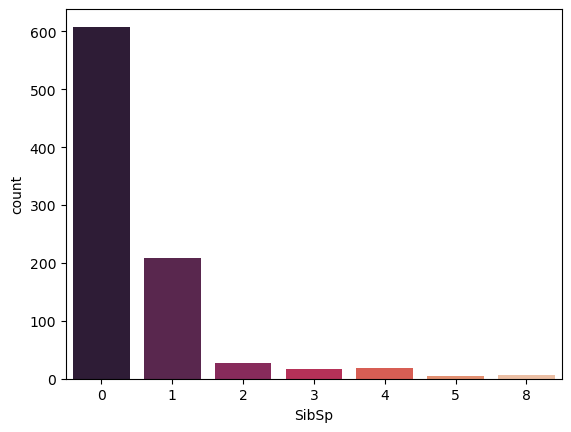

In [29]:
sns.countplot(x="SibSp", data=titanic, palette="rocket")

In [30]:
# most of the passengers do not have there siblings abroad

<AxesSubplot:ylabel='Frequency'>

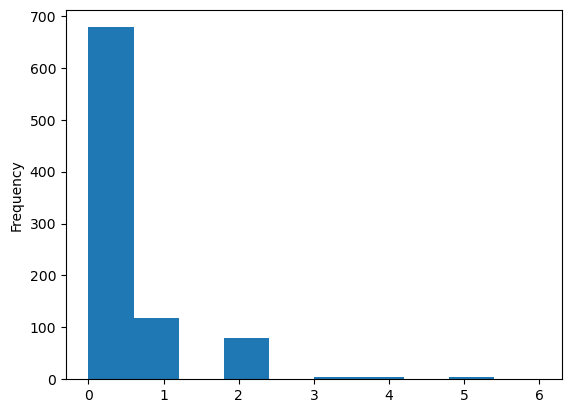

In [31]:
titanic["Parch"].plot.hist()

# Data Wrangling

In [32]:
# data wrangling means cleaning the data, removing the null values, dropping unwanted columns, adding new ones if needed

In [33]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

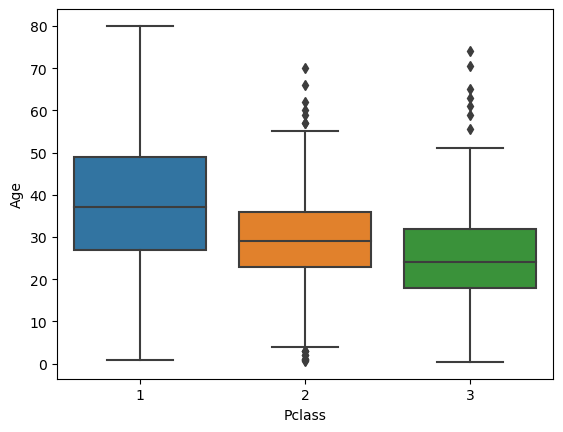

In [34]:
sns.boxplot(x="Pclass", y="Age",data=titanic)

In [35]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
titanic.drop("Cabin",axis=1,inplace=True)

In [37]:
titanic.dropna(inplace=True)

In [38]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [39]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [40]:
# now coverting few columns into categorical data to apply logistic regression

In [41]:
pd.get_dummies(titanic["Sex"]).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [42]:
sex=pd.get_dummies(titanic["Sex"], drop_first=True)
sex.head(3)

,male
0,1
1,0
2,0


In [43]:
#dropping the first column because one column is sufficient to determine the gender
#male(1)or male(0) means female

In [44]:
embark=pd.get_dummies(titanic["Embarked"])
embark.head(3)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1


In [45]:
embark=pd.get_dummies(titanic["Embarked"],drop_first=True)
embark.head(3)

,Q,S
0,0,1
1,0,0
2,0,1


In [46]:
# if both the values is 0 then the passenger is tarvelling in 1st class

In [47]:
pc1=pd.get_dummies(titanic["Pclass"], drop_first=True)
pc1.head(3)

,2,3
0,0,1
1,0,0
2,0,1


In [48]:
#The data is now converted into categorical data

In [49]:
titanic=pd.concat([titanic, sex, embark, pc1],axis=1)
titanic.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0


In [50]:
#deleting the unwanted columns

In [51]:
titanic.drop(["Name","PassengerId","Pclass","Ticket","Sex","Embarked"],axis=1,inplace=True)

In [52]:
titanic.head(4)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0


# Train Data

In [53]:
x=titanic.drop("Survived",axis=1)
y=titanic["Survived"]

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.33,random_state=4)

# Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
le=LogisticRegression()

In [58]:
le.fit(x_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
prediction= le.predict(x_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [61]:
from sklearn.metrics import classification_report

In [62]:
from sklearn.metrics import confusion_matrix

In [63]:
confusion_matrix(y_test,prediction)

array([[127,  18],
       [ 30,  60]], dtype=int64)

In [64]:
from sklearn.metrics import accuracy_score

In [65]:
accuracy_score(y_test,prediction)

0.7957446808510639